In [65]:
# Pipeline for preprocessing data for pca analysis
import glob
import os
import numpy as np
from joblib import Parallel, delayed
from tqdm import tqdm
from datetime import datetime
import json
from pathlib import Path
import h5py
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from ephysvibe.stats import smetrics
import matplotlib.pyplot as plt
from ephysvibe.structures.neuron_data import NeuronData
from ephysvibe.structures.bhv_data import BhvData
from ephysvibe.structures.eye_data import EyeData
from ephysvibe.trials import align_trials, select_trials

In [3]:
filepaths = {
    "lip": "/envau/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/lip/neurons/",
    "pfc": "/envau/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/pfc/neurons/",
    "v4": "/envau/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/v4/neurons/",
}

In [4]:
area='lip'
path = filepaths[area]
neu_path = path + "*neu.h5"
path_list = glob.glob(neu_path)

In [7]:
neu_data = NeuronData.from_python_hdf5(path_list[0])

In [ ]:
neu_data

In [21]:
eye_path = "/envau/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/new_structure/session_struct/eye/2023-02-09_10-42-54_Riesling_e1_r1_eye.h5"

In [22]:
eye_data = EyeData.from_python_hdf5(eye_path)

In [24]:
np.sum(~ np.isnan(eye_data.eye_ml[:,2]))

3552259

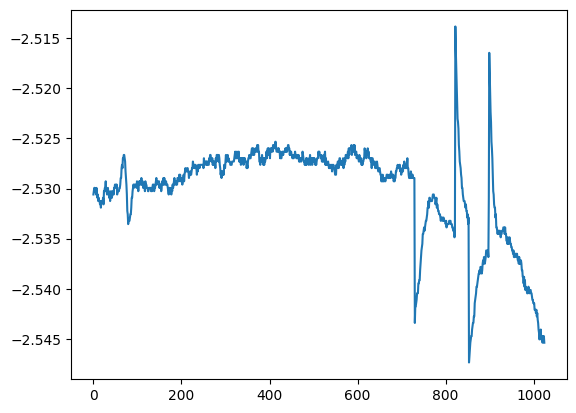

In [64]:
plt.plot(eye_data.eye_ml[:,2][eye_data.block==1][0][1200:])

In [55]:
np.where(eye_data.code_numbers[eye_data.block==1][0]==23)[0][0]
eye_data.code_samples[eye_data.block==1][0][4]


1464.0

In [90]:
sp_sample_on, mask_s = align_trials.align_on(
    sp_samples=eye_data.eye_ml[:,2],
    code_samples=eye_data.code_samples-1000,
    code_numbers=eye_data.code_numbers,
    trial_error=eye_data.trial_error,
    block=eye_data.block,
    pos_code=eye_data.pos_code,
    select_block=1,
    select_pos=1,
    event="sample_on",
    time_before=300,
    error_type=0,
)

In [78]:
eye_data.code_samples-1000

array([[  0.,  28., 215., ...,  nan,  nan,  nan],
       [  0.,  12., 156., ...,  nan,  nan,  nan],
       [  0.,  14., 150., ...,  nan,  nan,  nan],
       ...,
       [  0.,   4.,  15., ...,  nan,  nan,  nan],
       [  0.,   4.,  15., ...,  nan,  nan,  nan],
       [  0.,   2.,  14., ...,  nan,  nan,  nan]])

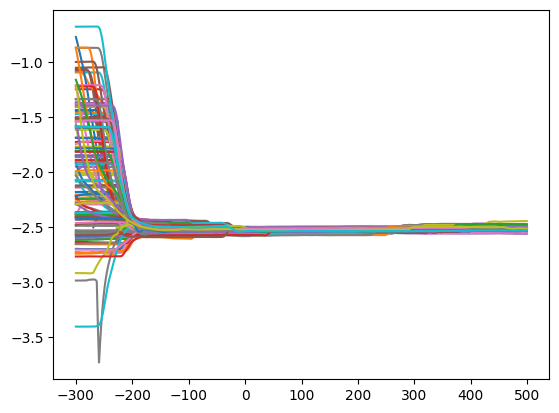

In [91]:
plt.plot(np.arange(800)-300,sp_sample_on[:,:300+500].T)